# Cancer Diagnosis Using Machine Learning

In [136]:
from sklearn.tree import DecisionTreeClassifier
from IPython.display import display
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

In [137]:
cancer_df = pd.read_csv('/Users/anitribunyan/Downloads/HW1/Cancer.csv')

In [138]:
# checking the dataset by printing every 10 lines:
(cancer_df[0::10])

,Clump_Thickness,Uniformity_of_Cell_Size,Uniformity_of_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Malignant_Cancer
0,5,1,1,1,2,1,3,1,1,0
10,5,3,3,3,2,3,4,4,1,1
20,5,4,4,9,2,10,5,6,1,1
30,9,5,8,1,2,3,2,1,5,1
40,5,3,5,5,3,3,4,10,1,1
50,5,1,3,1,2,1,2,1,1,0
60,2,2,2,1,1,1,7,1,1,0
70,1,1,1,1,2,1,3,1,1,0
80,10,3,5,1,10,5,3,10,2,1
90,1,3,1,2,2,2,5,3,2,0


In [139]:
X = cancer_df.drop(['Malignant_Cancer'], axis= 'columns')
print(X.head())
len(cancer_df)

   Clump_Thickness  Uniformity_of_Cell_Size  Uniformity_of_Cell_Shape  \
0                5                        1                         1   
1                5                        4                         4   
2                3                        1                         1   
3                6                        8                         8   
4                4                        1                         1   

   Marginal_Adhesion  Single_Epithelial_Cell_Size  Bare_Nuclei  \
0                  1                            2            1   
1                  5                            7           10   
2                  1                            2            2   
3                  1                            3            4   
4                  3                            2            1   

   Bland_Chromatin  Normal_Nucleoli  Mitoses  
0                3                1        1  
1                3                2        1  
2                3     

150

In [140]:
y = cancer_df['Malignant_Cancer']
y[::10]

0      0
10     1
20     1
30     1
40     1
50     0
60     0
70     0
80     1
90     0
100    1
110    1
120    1
130    1
140    0
Name: Malignant_Cancer, dtype: int64

In [141]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

# “Decision Tree Classifier” to predict Cancer

In [142]:
from sklearn.metrics import accuracy_score
my_DecisionTree = DecisionTreeClassifier(random_state=2)
my_DecisionTree.fit(X_train, y_train)

y_predict_dt = my_DecisionTree.predict(X_test)
accuracyDT = accuracy_score(y_test, y_predict_dt)
accuracyDT

from sklearn import metrics
from sklearn.metrics import roc_curve, roc_auc_score

predictions = my_DecisionTree.predict_proba(X_test)
dtfpr, dttpr, dtthresholds = metrics.roc_curve(y_test, predictions[:,1], pos_label=1)

# AUC:
AUC = metrics.auc(dtfpr, dttpr)

print()
print("Accuracy Score: " + str(accuracyDT))
print("AUC: " + str(AUC))


Accuracy Score: 0.8666666666666667
AUC: 0.8697478991596639


# Bagging

In [143]:
from sklearn.utils import resample
predictions_df = pd.DataFrame()
 
 
for i in range(0,18):
    bootstrap_size = int(0.8*len(X_train))
    x_bag, y_bag = resample(X_train,y_train, n_samples = bootstrap_size , random_state=i , replace = True) 
    Base_DecisionTree = DecisionTreeClassifier(random_state=2)
    Base_DecisionTree.fit(x_bag, y_bag)
    predictions_df['Sample ' + str(i)] = Base_DecisionTree.predict(X_test)
   
predictions_df[0::5]

,Sample 0,Sample 1,Sample 2,Sample 3,Sample 4,Sample 5,Sample 6,Sample 7,Sample 8,Sample 9,Sample 10,Sample 11,Sample 12,Sample 13,Sample 14,Sample 15,Sample 16,Sample 17
0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
5,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
10,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1
15,0,1,1,0,0,1,0,1,1,1,0,0,1,0,1,0,0,1
20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
25,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
30,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
35,1,0,0,0,0,1,1,0,0,0,0,1,0,1,1,0,1,0
40,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


# Perform Voting to make the final decision

In [144]:

sum_rows = pd.Series(predictions_df.sum(axis=1))
predictions_df = predictions_df.assign(count = sum_rows)
majority_arr = []

for i in range(0,len(predictions_df)):
    if(sum_rows[i]>= 10):
        majority_arr.append(1)
    else:
        majority_arr.append(0)
        

predictions_df = predictions_df.assign(majority = pd.Series(majority_arr))

In [145]:
#getting final accuracy based on voting on the majority of results from all predictions on samples
from sklearn.metrics import accuracy_score
final_accuracy = accuracy_score(y_test, predictions_df['majority'])
final_accuracy

0.8888888888888888

# scikit-learn “Adaboost” classifier to predict Cancer

In [146]:
from sklearn.ensemble import AdaBoostClassifier
my_AdaBoost = AdaBoostClassifier(n_estimators = 29,random_state=2)

my_AdaBoost.fit(X_train, y_train)

y_predict_ad = my_AdaBoost.predict(X_test)
accuracyAB = accuracy_score(y_test, y_predict_ad)
accuracyAB

adaBoostPredictions = my_AdaBoost.predict_proba(X_test)
abfpr, abtpr, abthresholds = metrics.roc_curve(y_test, adaBoostPredictions[:,1], pos_label=1)

# AUC:
abAUC = metrics.auc(abfpr, abtpr)

print()
print("Accuracy Score: " + str(accuracyAB))
print("AUC: " + str(abAUC))


Accuracy Score: 0.9555555555555556
AUC: 0.9653361344537815


# “XGBoost” to predict cancer

In [147]:
from xgboost import XGBClassifier
my_XGBoost = XGBClassifier(n_estimators = 29,random_state=2)

my_XGBoost.fit(X_train, y_train)

y_predict_xg = my_XGBoost.predict(X_test)
accuracyXG = accuracy_score(y_test, y_predict_xg)
accuracyXG

xgBoostPredictions = my_AdaBoost.predict_proba(X_test)
xgfpr, xgtpr, xgthresholds = metrics.roc_curve(y_test, xgBoostPredictions[:,1], pos_label=1)

# AUC:
xgAUC = metrics.auc(xgfpr, xgtpr)

print()
print("Accuracy Score: " + str(accuracyXG))
print("AUC: " + str(xgAUC))



Accuracy Score: 0.9555555555555556
AUC: 0.9653361344537815


/Users/anitribunyan/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


# scikit-learn “Random Forest” classifier to predict Cancer 

In [148]:
from sklearn.ensemble import RandomForestClassifier
my_RandomForest = RandomForestClassifier(n_estimators = 29, bootstrap = True, random_state=2)

my_RandomForest.fit(X_train, y_train)

y_predict_rf = my_RandomForest.predict(X_test)
accuracyRF = accuracy_score(y_test, y_predict_rf)
accuracyRF

randomForestPredictions = my_RandomForest.predict_proba(X_test)
rffpr, rftpr, rfthresholds = metrics.roc_curve(y_test, randomForestPredictions[:,1], pos_label=1)

# AUC:
rfAUC = metrics.auc(rffpr, rftpr)

print()
print("Accuracy Score: " + str(accuracyRF))
print("AUC: " + str(rfAUC))




Accuracy Score: 0.9555555555555556
AUC: 0.9516806722689075


# ROC curves

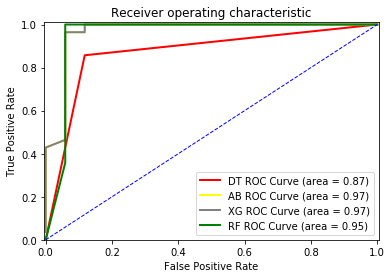

In [149]:
# Importing the "pyplot" package of "matplotlib" library of python to generate 
# graphs and plot curves:
import matplotlib.pyplot as plt

# The following line will tell Jupyter Notebook to keep the figures inside the explorer page 
# rather than openng a new figure window:
%matplotlib inline

plt.figure()

# Roc Curve:
plt.plot(dtfpr, dttpr, color='red', lw=2, 
         label='DT ROC Curve (area = %0.2f)' % AUC)

plt.plot(abfpr, abtpr, color='yellow', lw=2, 
         label='AB ROC Curve (area = %0.2f)' % abAUC)

plt.plot(xgfpr, xgtpr, color='grey', lw=2, 
         label='XG ROC Curve (area = %0.2f)' % abAUC)

plt.plot(rffpr, rftpr, color='green', lw=2, 
         label='RF ROC Curve (area = %0.2f)' % rfAUC)

# Random Guess line:
plt.plot([0, 1], [0, 1], color='blue', lw=1, linestyle='--')

# Defining The Range of X-Axis and Y-Axis:
plt.xlim([-0.005, 1.005])
plt.ylim([0.0, 1.01])

# Labels, Title, Legend:
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

plt.show()

In [150]:
print("AUC COMPARISON")
print("---------------")
print("DecisionTree: " + str(AUC))
print("AdaBoost: " + str(abAUC))
print("XGBoost: " + str(xgAUC))
print("RandomForest: " + str(rfAUC))
print()
print("The best AUC values are of the AdaBoost and XGBoost, for they are the same.")


AUC COMPARISON
---------------
DecisionTree: 0.8697478991596639
AdaBoost: 0.9653361344537815
XGBoost: 0.9653361344537815
RandomForest: 0.9516806722689075

The best AUC values are of the AdaBoost and XGBoost, for they are the same.


In [151]:
print("ACCURACY COMPARISON")
print("---------------")
print("DecisionTree: " + str(accuracyDT) + " , after Bagging: " + str(final_accuracy))
print("AdaBoost: " + str(accuracyAB))
print("XGBoost: " + str(accuracyXG))
print("RandomForest: " + str(accuracyRF))
print()
print("The best AUC values are of the AdaBoost,XGBoost, and RandomForest, for they are the same.")

ACCURACY COMPARISON
---------------
DecisionTree: 0.8666666666666667 , after Bagging: 0.8888888888888888
AdaBoost: 0.9555555555555556
XGBoost: 0.9555555555555556
RandomForest: 0.9555555555555556

The best AUC values are of the AdaBoost,XGBoost, and RandomForest, for they are the same.


In [152]:
#Which algorithm is the best when we want a False Positive Rate of %7?
print("The best algorithm for a False Positive Rate of %7 is XGBoost and RandomForest.")

The best algorithm for a False Positive Rate of %7 is XGBoost and RandomForest.
